<a href="https://colab.research.google.com/github/aparna-2001/medical-insurance-charges-ML-model-2021-2025/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
medical_df_clean = pd.read_csv('medical_df_clean.csv')

In [7]:
X = medical_df_clean.drop(columns=['charges'])
y = medical_df_clean['charges']

print(f"Features : {X.shape[1]}")
print(f"Rows     : {X.shape[0]}")
print(X.columns.tolist())

Features : 9
Rows     : 1337
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'age_smoker_interaction']


In [10]:

train_x, test_x, train_y, test_y = train_test_split(
    X, y,
    train_size=0.8,
    random_state= 100
)

print(f"Train : {train_x.shape}")
print(f"Test  : {test_y.shape}")

Train : (1069, 9)
Test  : (268,)


In [12]:
rf_model = RandomForestRegressor(
    n_estimators=100,    # number of trees
    random_state=100,     # reproducibility
    n_jobs=-1            # use all CPU cores
)

rf_model.fit(train_x, train_y)
print("Training complete")

Training complete


**Prediction**

In [19]:
y_pred_train = rf_model.predict(train_x)  # training predictions
y_pred_test  = rf_model.predict(test_x)   # test predictions

**Evaluation**

In [18]:
# Training performance
train_r2   = r2_score(train_y, y_pred_train)
train_mae  = mean_absolute_error(train_y, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(train_y, y_pred_train))

# Test performance
test_r2   = r2_score(test_y, y_pred_test)
test_mae  = mean_absolute_error(test_y, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(test_y, y_pred_test))

print("=" * 45)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("=" * 45)
print(f"{'R²':<15} {train_r2:>12.4f} {test_r2:>12.4f}")
print(f"{'MAE':<15} {train_mae:>12.2f} {test_mae:>12.2f}")
print(f"{'RMSE':<15} {train_rmse:>12.2f} {test_rmse:>12.2f}")
print("=" * 45)


Metric                 Train         Test
R²                    0.9756       0.8409
MAE                  1037.71      2733.99
RMSE                 1907.88      4643.65


* The model is performing 13.5% better on training data than test data

* This may be due to overfitting

* Healthy gap   →  Train R² vs Test R² difference < 0.05
* Observed gap      →  0.1347  ← needs fixing

*Fixing overfitting*

In [29]:
rf_model_2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,           # limit tree depth
    min_samples_leaf=4,     # minimum samples at leaf node
    min_samples_split=10,   # minimum samples to split a node
    random_state=100,
    n_jobs=-1
)

rf_model_2.fit(train_x, train_y)
print("Training complete")

Training complete


In [30]:
y_pred_train_2 = rf_model_2.predict(train_x)  # training predictions
y_pred_test_2  = rf_model_2.predict(test_x)   # test predictions

In [31]:
#evaluation

# Training performance
train_r2_2   = r2_score(train_y, y_pred_train_2)
train_mae_2  = mean_absolute_error(train_y, y_pred_train)
train_rmse_2 = np.sqrt(mean_squared_error(train_y, y_pred_train_2))

# Test performance
test_r2_2  = r2_score(test_y, y_pred_test_2)
test_mae_2  = mean_absolute_error(test_y, y_pred_test_2)
test_rmse_2 = np.sqrt(mean_squared_error(test_y, y_pred_test_2))

print("=" * 45)
print(f"{'Metric':<15} {'Train':>12} {'Test':>12}")
print("=" * 45)
print(f"{'R²':<15} {train_r2_2:>12.4f} {test_r2_2:>12.4f}")
print(f"{'MAE':<15} {train_mae_2:>12.2f} {test_mae_2:>12.2f}")
print(f"{'RMSE':<15} {train_rmse_2:>12.2f} {test_rmse_2:>12.2f}")
print("=" * 45)


Metric                 Train         Test
R²                    0.9100       0.8647
MAE                  1037.71      2464.00
RMSE                 3666.39      4282.69


* Test R²   : 0.8409 → 0.8647  ; better generalisation
* Test MAE  : 2733   → 2464    
* Test RMSE : 4643   → 4282    ; extreme errors reduced
* R² gap    : 0.1347 → 0.0453  ; overfitting significantly reduced

* OLS best       →  R² = 0.751
* Random Forest  →  R² = 0.8647 : (+11.4% improvement)
* Gap            →  0.0453        

**Important features**

                  Feature  Importance
4              smoker_yes    0.615429
1                     bmi    0.213889
0                     age    0.121381
2                children    0.017312
8  age_smoker_interaction    0.011192
3                sex_male    0.005920
5        region_northwest    0.005444
6        region_southeast    0.005131
7        region_southwest    0.004302


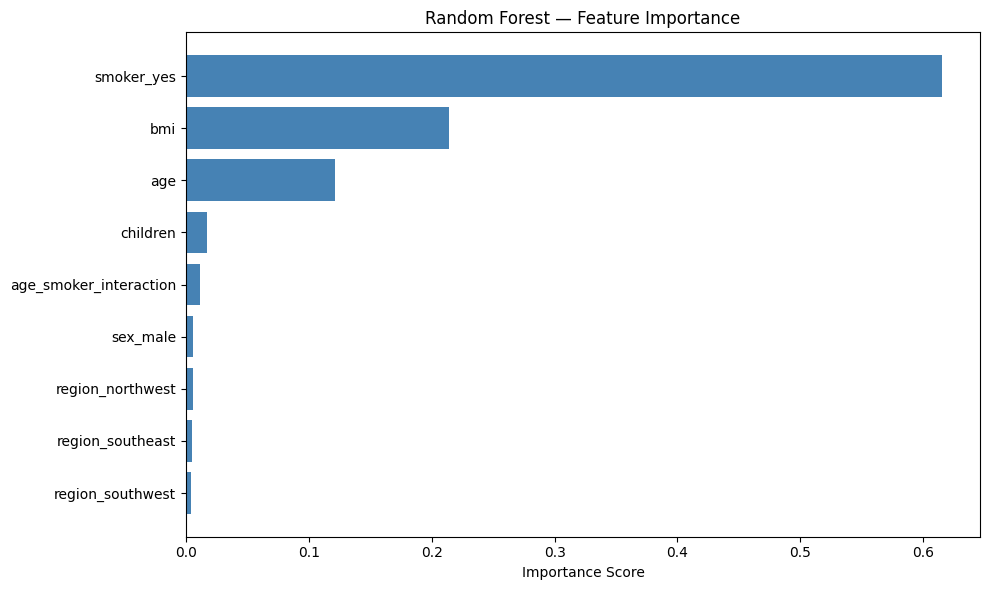

In [21]:
importance_df = pd.DataFrame({
    'Feature'   : X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)

# Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][::-1],
         importance_df['Importance'][::-1],
         color='steelblue')
plt.xlabel('Importance Score')
plt.title('Random Forest — Feature Importance')
plt.tight_layout()
plt.show()


* Three factors dominates the charge;
    * smoker_yes
    * bmi
    * age

* This will be the most crucial elements in deciding the charges for an insurance company

**Residual plot**

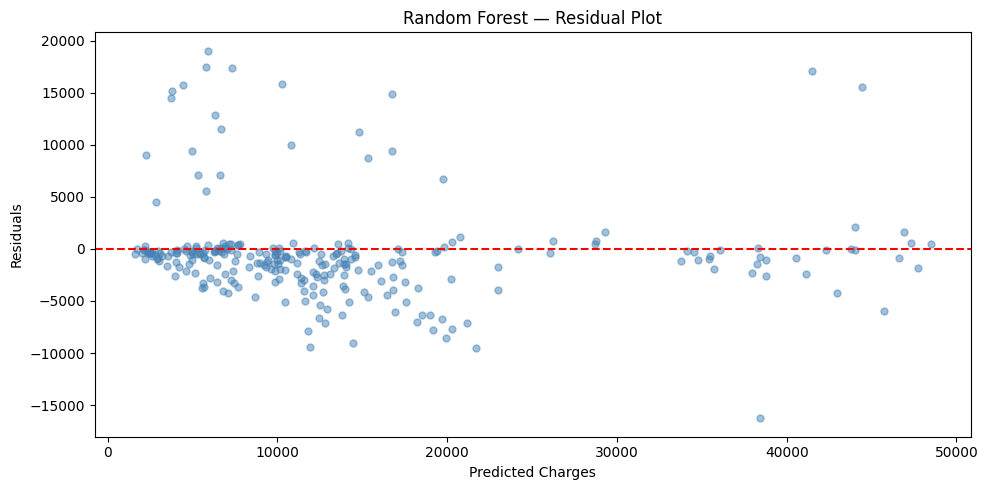

In [24]:
residuals = test_y - y_pred_test

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, alpha=0.5, color='steelblue', s=25)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Random Forest — Residual Plot')
plt.tight_layout()
plt.show()


**Comparison with OLS**

* Distinct clusters are not visible

* Skewness reduced

* Heteroscedasticity still present, but not severe as in OLS

In [32]:
comparison_table = pd.DataFrame({
    'Metric': [
        'R² Train', 'R² Test', 'MAE Train', 'MAE Test',
        'RMSE Train', 'RMSE Test', 'R² Gap',
        'Skew', 'Kurtosis', 'Durbin-Watson', 'Jarque-Bera', 'Observations'
    ],
    'OLS Full': [
        '-', 0.751, '-', '-', '-', '-', '-',
        1.228, 5.553, 1.980, 559.087, 1069
    ],
    'OLS Reduced': [
        '-', 0.749, '-', '-', '-', '-', '-',
        1.227, 5.528, 1.971, 553.035, 1069
    ],
    'OLS Cooks': [
        '-', 0.747, '-', '-', '-', '-', '-',
        1.277, 5.863, 2.123, 583.182, 951
    ],
    'OLS VIF Fixed': [
        '-', 0.751, '-', '-', '-', '-', '-',
        1.210, 5.641, 2.093, 714.823, 1337
    ],
    'RF Default': [
        0.9756, 0.8409, 1037.71, 2733.99,
        1907.88, 4643.65, 0.1347,
        '-', '-', '-', '-', 1337
    ],
    'RF Tuned': [
        0.9100, 0.8647, 1037.71, 2464.00,
        3666.39, 4282.69, 0.0453,
        '-', '-', '-', '-', 1337
    ],
    'Gradient Boosting': [
        '-', '-', '-', '-', '-', '-', '-',
        '-', '-', '-', '-', '-'
    ]
})

comparison_table.set_index('Metric', inplace=True)
comparison_table

,OLS Full,OLS Reduced,OLS Cooks,OLS VIF Fixed,RF Default,RF Tuned,Gradient Boosting
Metric,,,,,,,
R² Train,-,-,-,-,0.9756,0.91,-
R² Test,0.751,0.749,0.747,0.751,0.8409,0.8647,-
MAE Train,-,-,-,-,1037.71,1037.71,-
MAE Test,-,-,-,-,2733.99,2464.0,-
RMSE Train,-,-,-,-,1907.88,3666.39,-
RMSE Test,-,-,-,-,4643.65,4282.69,-
R² Gap,-,-,-,-,0.1347,0.0453,-
Skew,1.228,1.227,1.277,1.21,-,-,-
Kurtosis,5.553,5.528,5.863,5.641,-,-,-
